In [8]:
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (9)\customer_purchase_data.csv")
df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [44]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [49]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','NumberOfPurchases']])
y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


array([0, 1, 1, ..., 0, 2, 0])

In [50]:
df['cluster']=y_predicted
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,cluster
0,40,1,66120.267939,8,0,30.568601,0,5,1,0
1,20,1,23579.773583,4,2,38.240097,0,5,0,1
2,27,1,127821.306432,11,2,31.633212,1,0,1,1
3,24,1,137798.623120,19,3,46.167059,0,4,1,1
4,31,1,99300.964220,19,1,19.823592,0,0,1,1


In [51]:
km.cluster_centers_

array([[44.62830189, 10.61132075],
       [25.91563786, 10.54115226],
       [62.39669421, 10.08884298]])

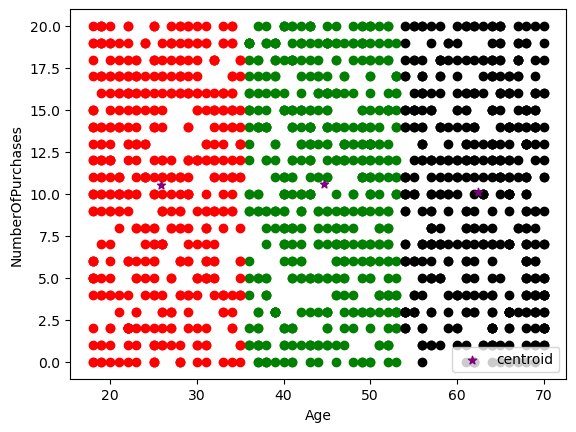

In [52]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['NumberOfPurchases'],color='green')
plt.scatter(df2.Age,df2['NumberOfPurchases'],color='red')
plt.scatter(df3.Age,df3['NumberOfPurchases'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('NumberOfPurchases')
plt.legend()

In [53]:
scaler = MinMaxScaler()

scaler.fit(df[['NumberOfPurchases']])
df['NumberOfPurchases'] = scaler.transform(df[['NumberOfPurchases']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [54]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,cluster
0,0.423077,1,66120.267939,0.40,0,30.568601,0,5,1,0
1,0.038462,1,23579.773583,0.20,2,38.240097,0,5,0,1
2,0.173077,1,127821.306432,0.55,2,31.633212,1,0,1,1
3,0.115385,1,137798.623120,0.95,3,46.167059,0,4,1,1
4,0.250000,1,99300.964220,0.95,1,19.823592,0,0,1,1


In [57]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','NumberOfPurchases']])
y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


array([2, 2, 2, ..., 1, 0, 0])

In [58]:
df['cluster']=y_predicted
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,cluster
0,0.423077,1,66120.267939,0.40,0,30.568601,0,5,1,2
1,0.038462,1,23579.773583,0.20,2,38.240097,0,5,0,2
2,0.173077,1,127821.306432,0.55,2,31.633212,1,0,1,2
3,0.115385,1,137798.623120,0.95,3,46.167059,0,4,1,2
4,0.250000,1,99300.964220,0.95,1,19.823592,0,0,1,2


In [59]:
km.cluster_centers_

array([[0.69418656, 0.75421456],
       [0.67415488, 0.21390135],
       [0.17965587, 0.54962406]])

In [63]:
import os
os.environ["OMP_NUM_THREADS"] = "6"

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

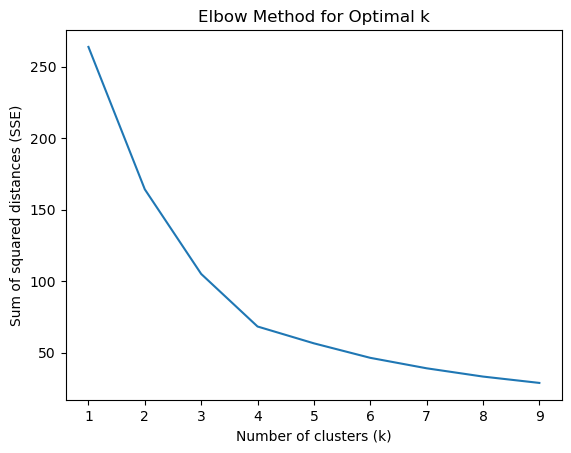

In [64]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the data
x = df['Age']
y = df['NumberOfPurchases']

# Set environment variable
os.environ["OMP_NUM_THREADS"] = "6"

# Calculate SSE for different values of k
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)  # Explicitly set n_init
    km.fit(df[['Age', 'NumberOfPurchases']])
    sse.append(km.inertia_)

# Plot the SSE values
plt.plot(k_rng, sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
import kagglehub
import os
import pandas as pd

# Load the dataset into a dataframe
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (9)\customer_purchase_data.csv")

# Display the first few rows of the dataframe
print(df.head())

# Handle missing values (if any)
df = df.fillna(df.mean())

# Select relevant features for clustering
features = df[['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'PurchaseStatus']]

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means to the dataset
optimal_clusters = 5  # Replace with the actual optimal number of clusters determined from the Elbow method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Plotting the clusters
import seaborn as sns
sns.scatterplot(x='Age', y='AnnualIncome', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.show()


   Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0   40       1   66120.267939                  8                0   
1   20       1   23579.773583                  4                2   
2   27       1  127821.306432                 11                2   
3   24       1  137798.623120                 19                3   
4   31       1   99300.964220                 19                1   

   TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0           30.568601               0                 5               1  
1           38.240097               0                 5               0  
2           31.633212               1                 0               1  
3           46.167059               0                 4               1  
4           19.823592               0                 0               1  


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window